# Loading Dataset

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Data Science lab/Iris/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [15]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('variety',axis=1)
y=df['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


In [17]:

# training the model on training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_model = DecisionTreeClassifier(criterion='entropy')
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_test)

print(clf_model.score(X_train, y_train))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
0.9666666666666667
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.95      0.95      0.95        21
   Virginica       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



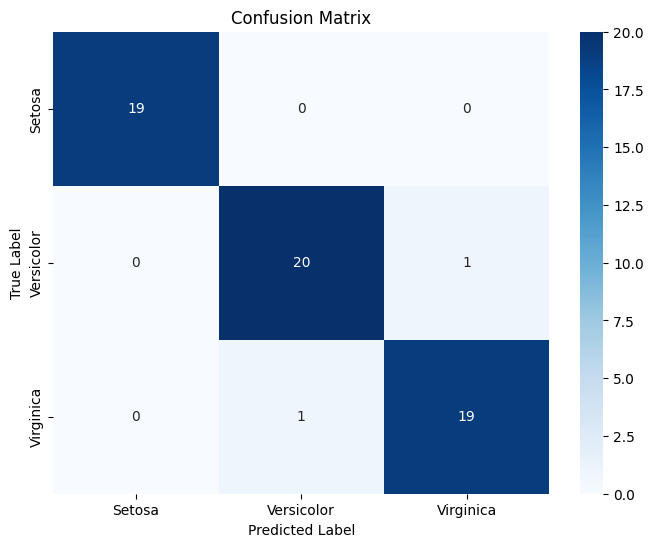

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Setosa','Versicolor','Virginica'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa','Versicolor','Virginica'], yticklabels=['Setosa','Versicolor','Virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
user_data=pd.DataFrame([[5.2,3.5,1.4,0.2]], columns=['sepal.length',	'sepal.width',	'petal.length',	'petal.width'])
prediction = clf_model.predict(	user_data)
class_label = prediction[0]
print(f"Prediction:  {class_label}")

Prediction:  Setosa


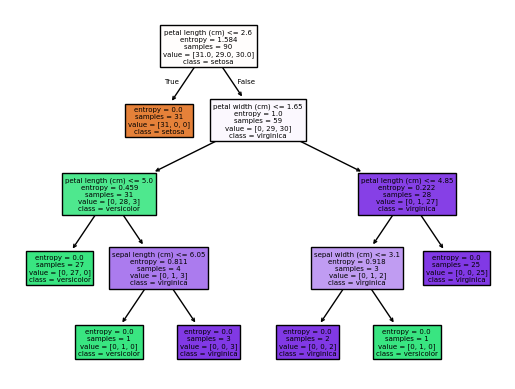

In [20]:
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']
tree.plot_tree(clf_model,
               feature_names = fn,
               class_names=cn,
               filled = True);